In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset='beta_center_p001'
npc=100
z=np.load('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/all_pop/tsvd/all_'+dataset+'_20190621_500PCs.npz')
with open('../../ukbb-tools/05_gbe/icdinfo.txt', 'r') as i:
    code2phe={line.split()[0]:line.split()[2] for line in i}

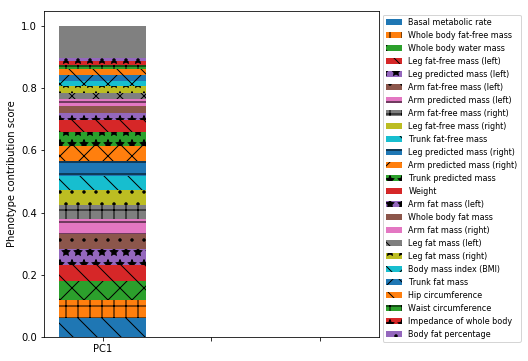

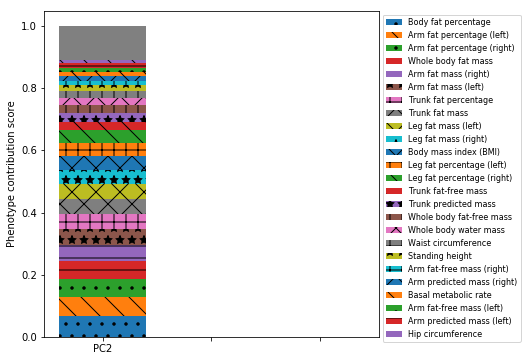

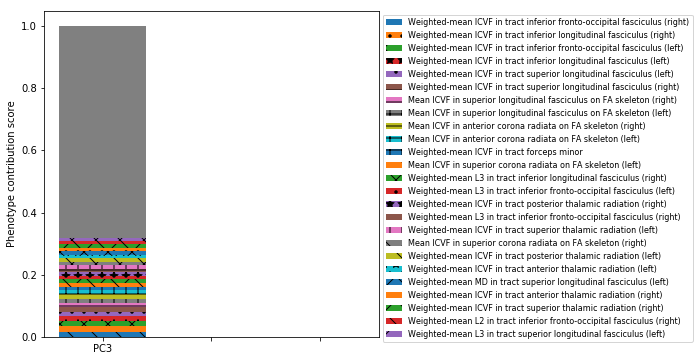

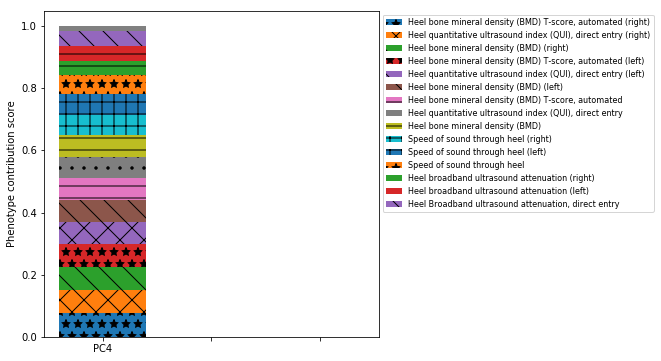

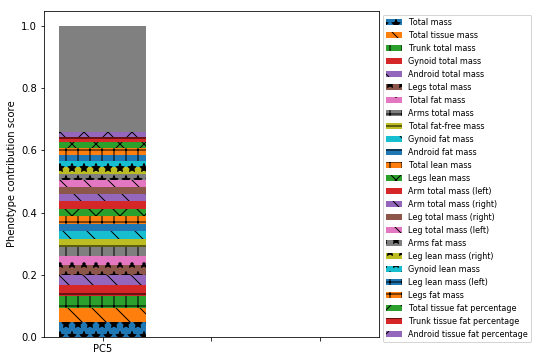

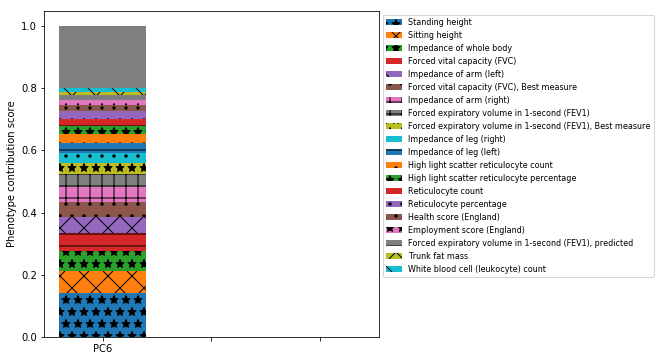

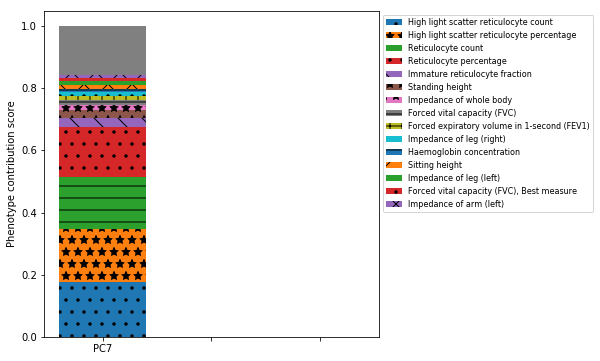

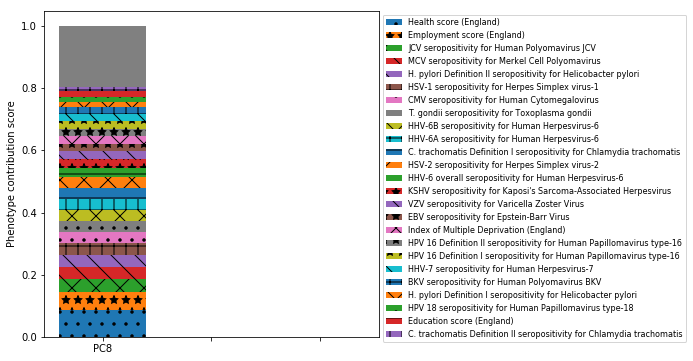

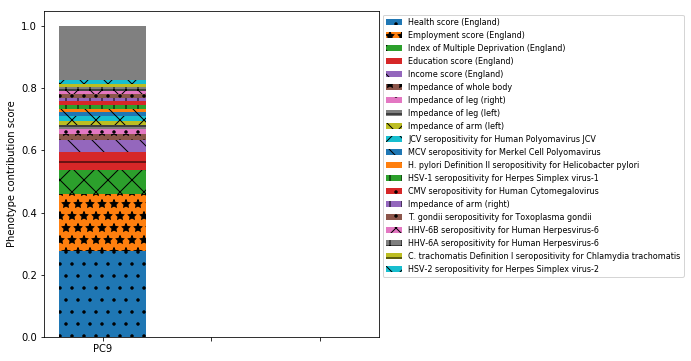

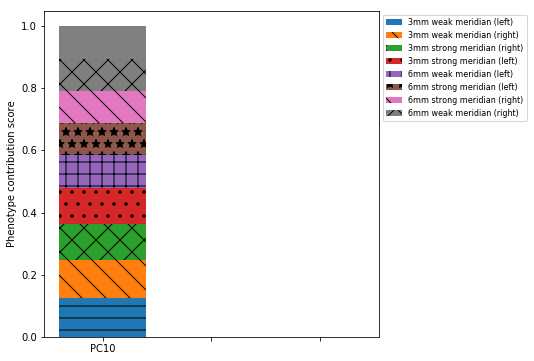

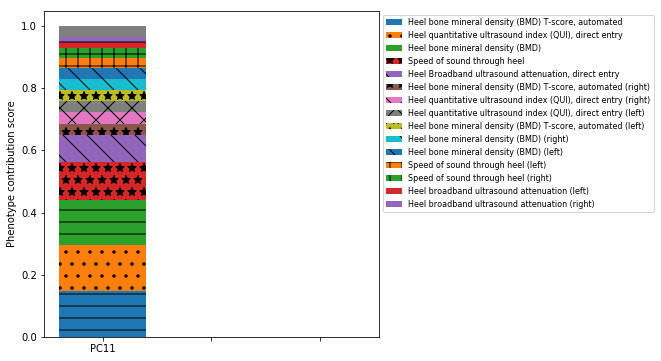

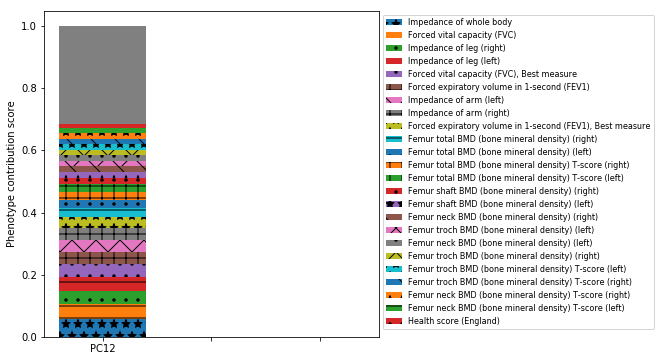

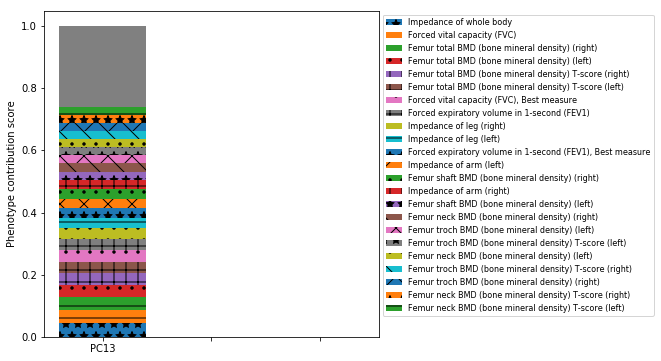

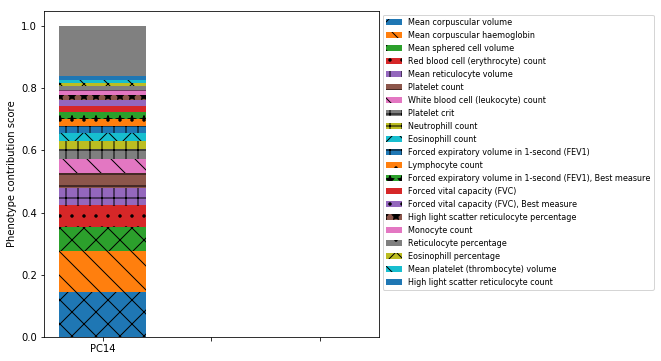

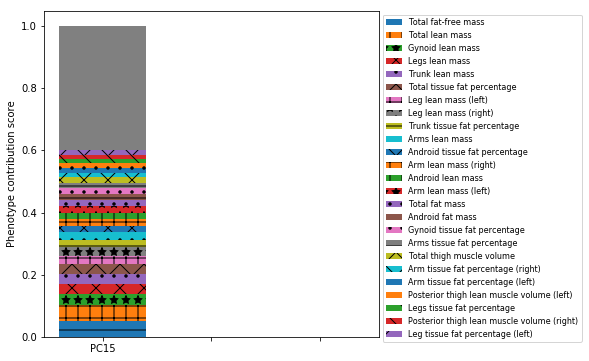

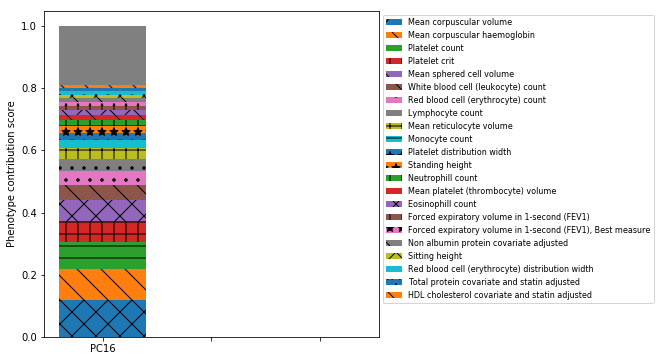

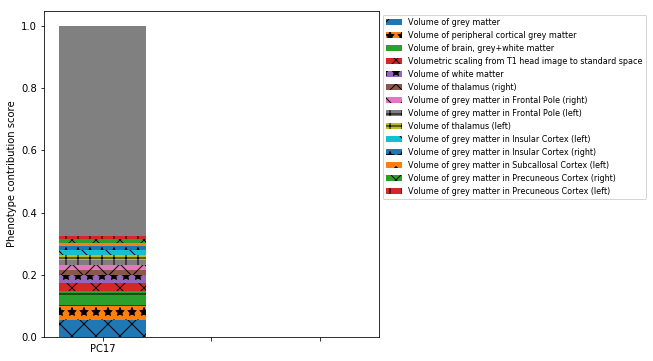

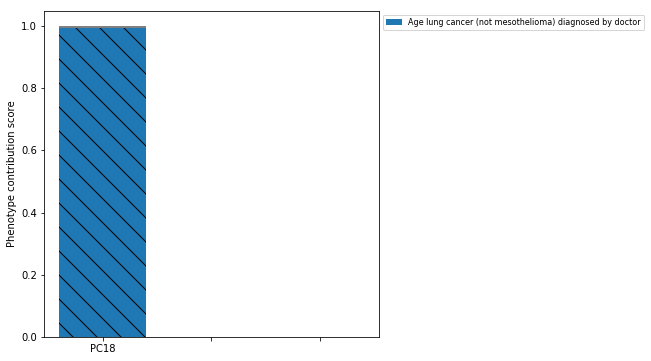

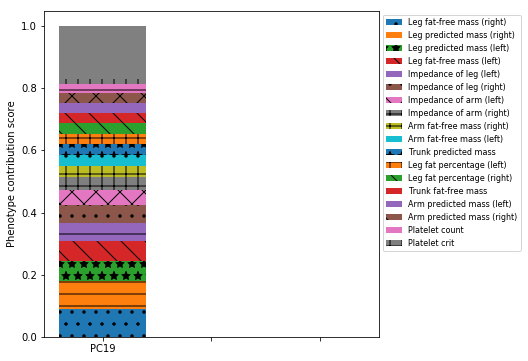

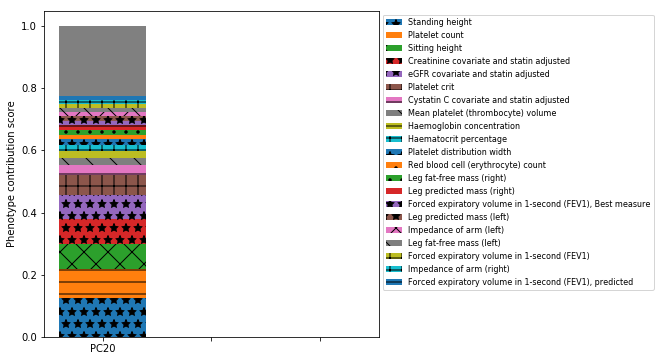

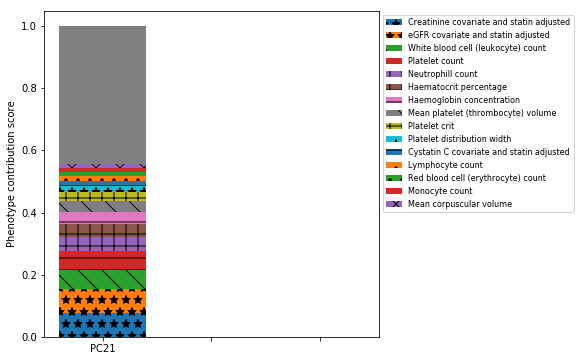

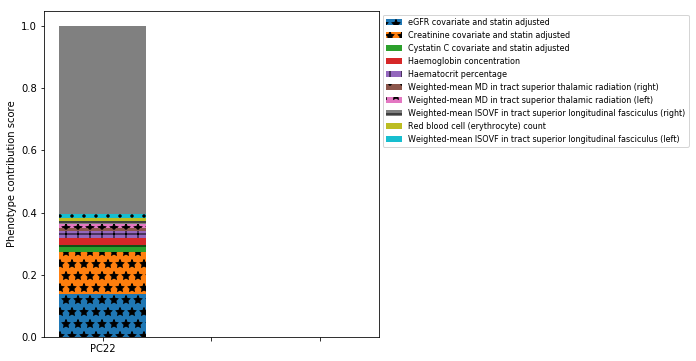

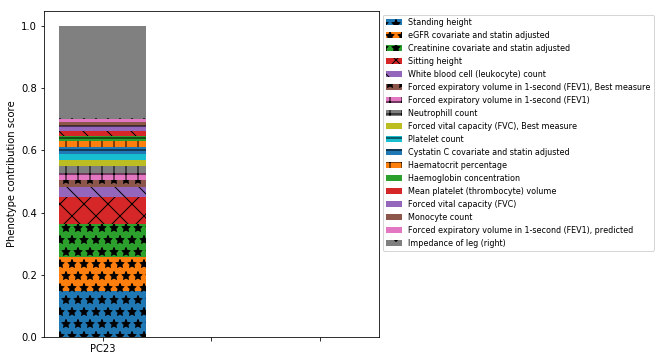

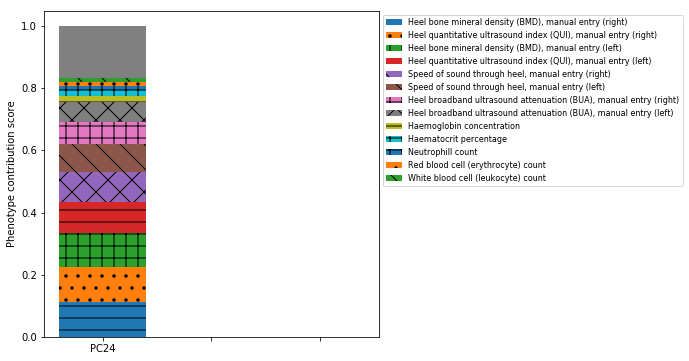

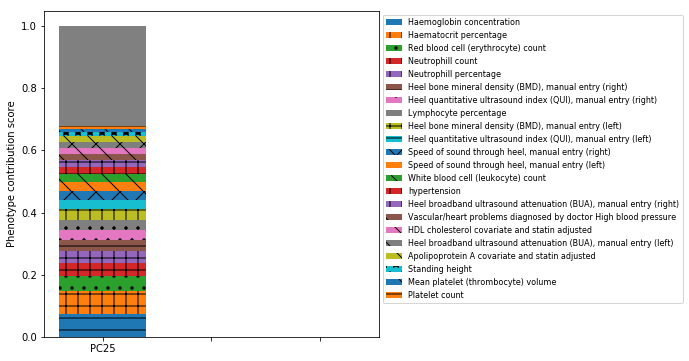

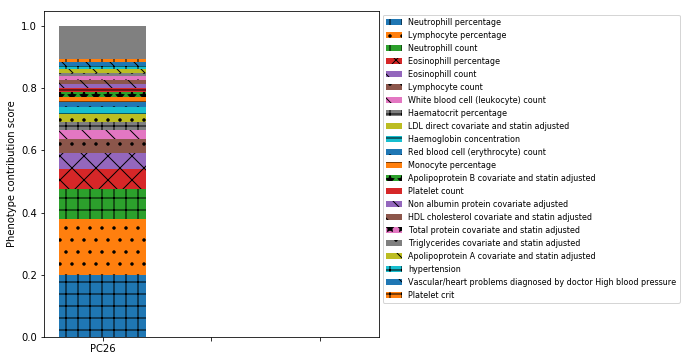

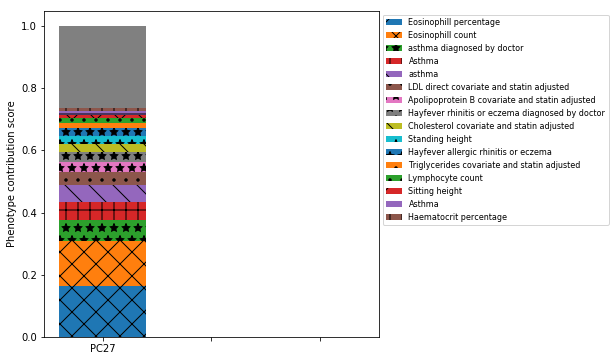

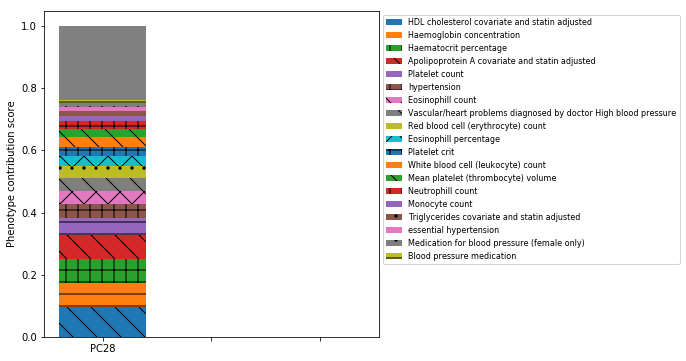

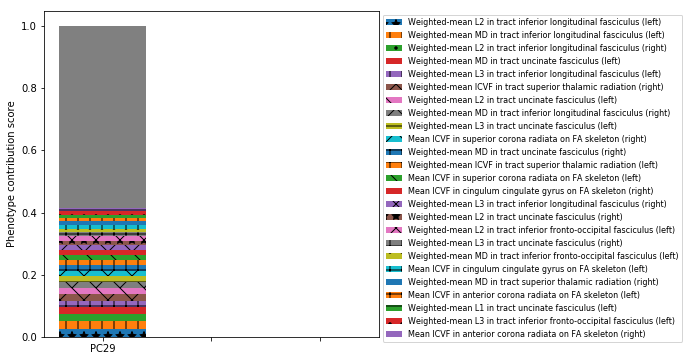

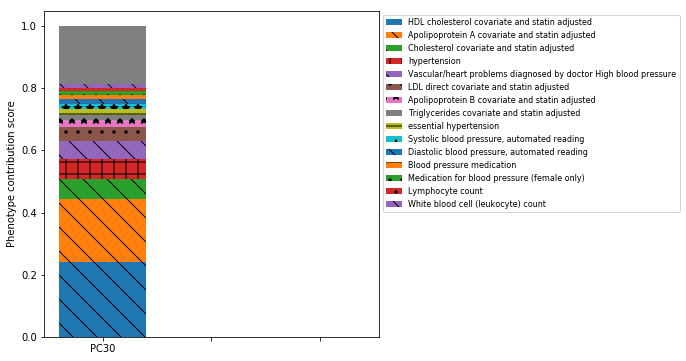

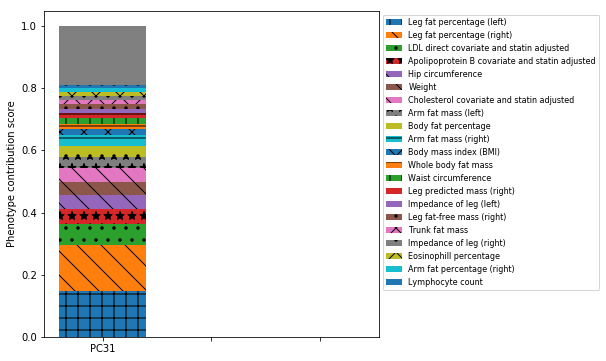

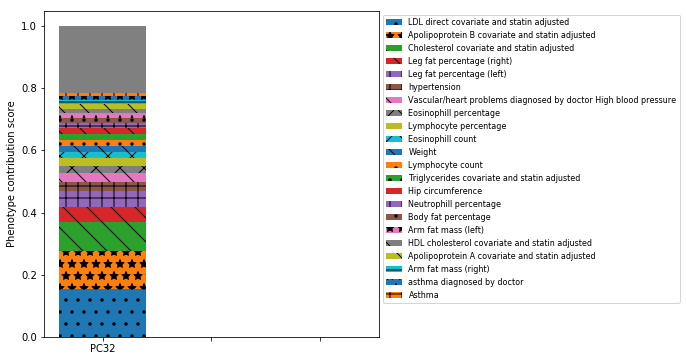

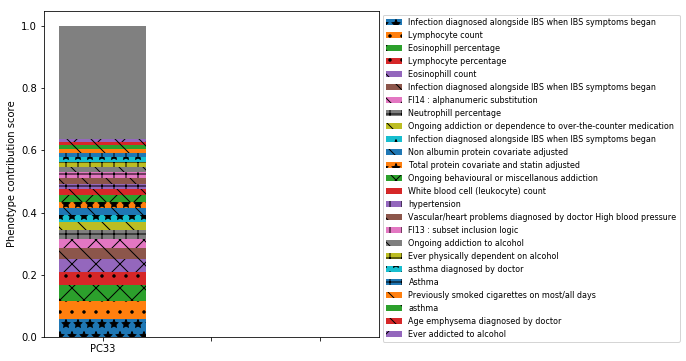

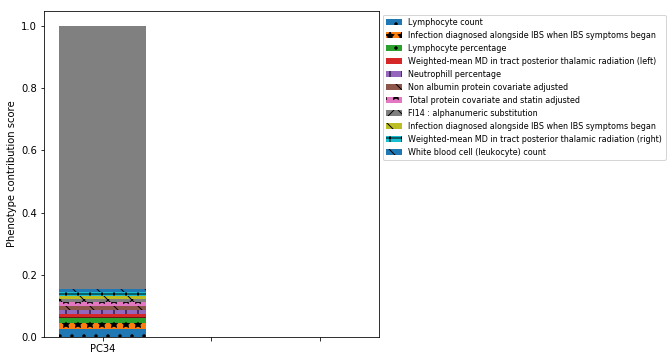

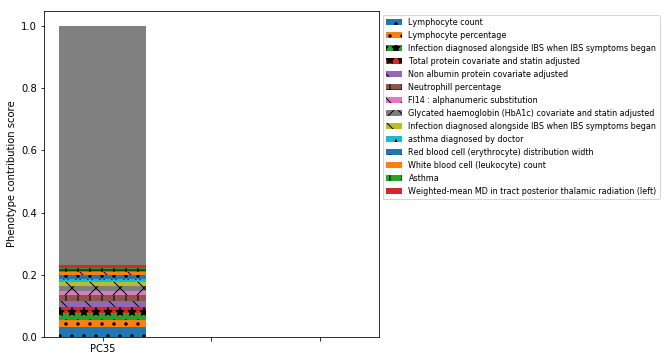

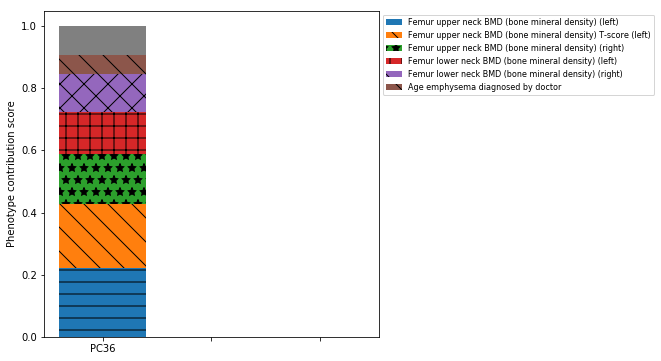

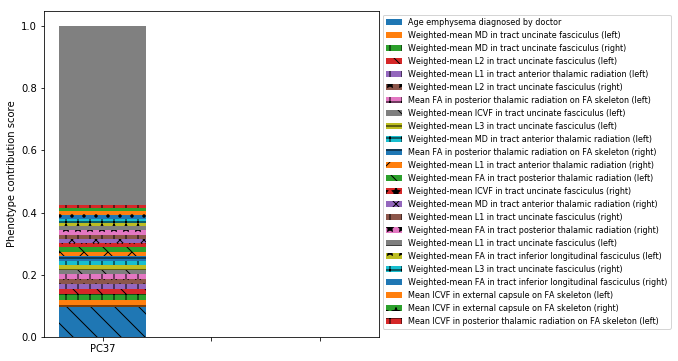

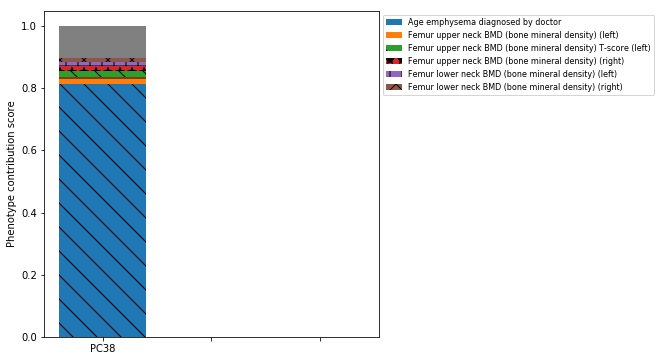

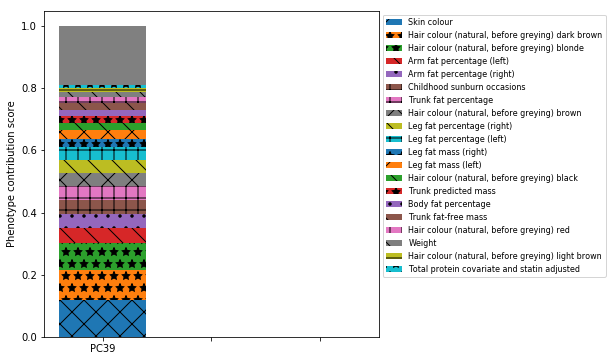

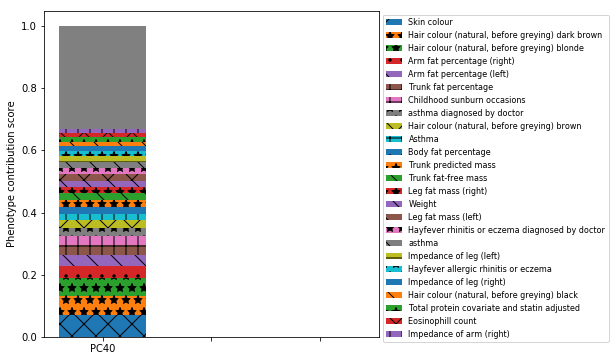

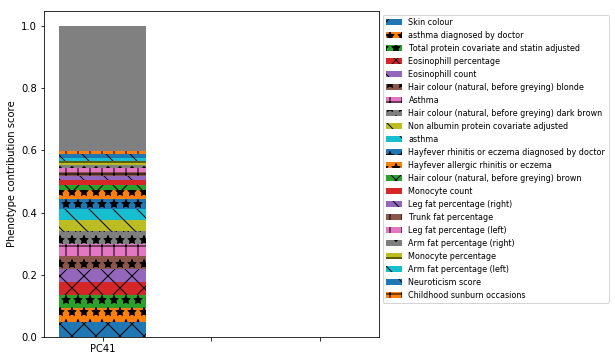

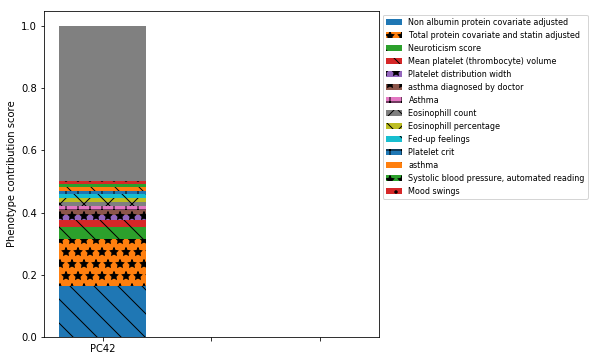

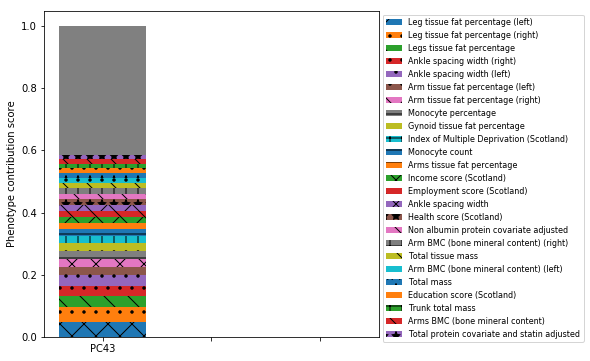

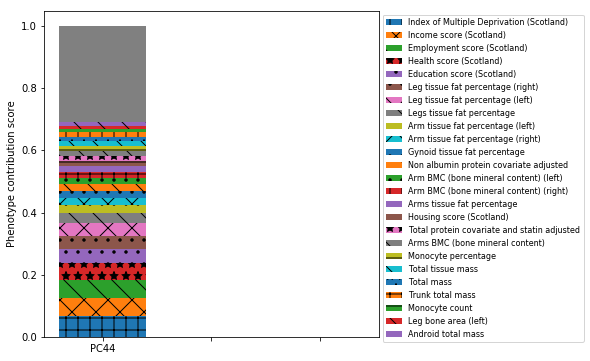

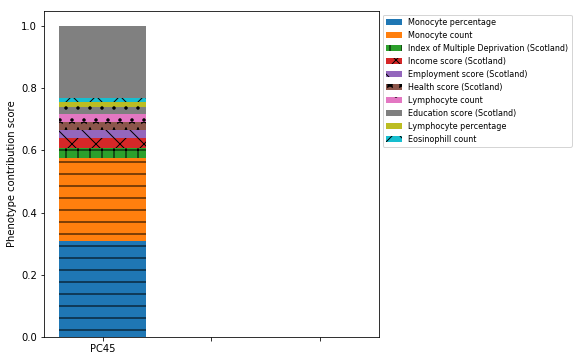

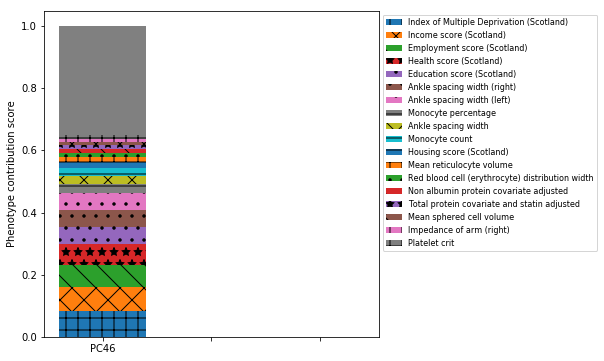

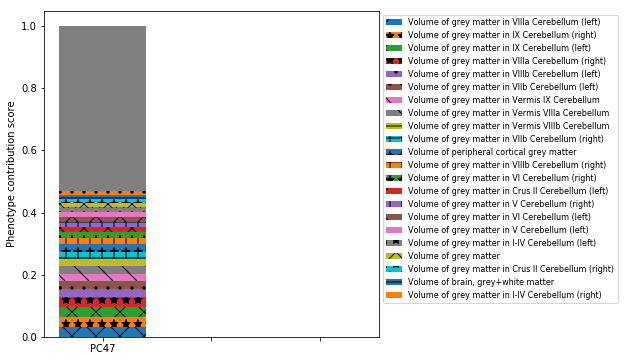

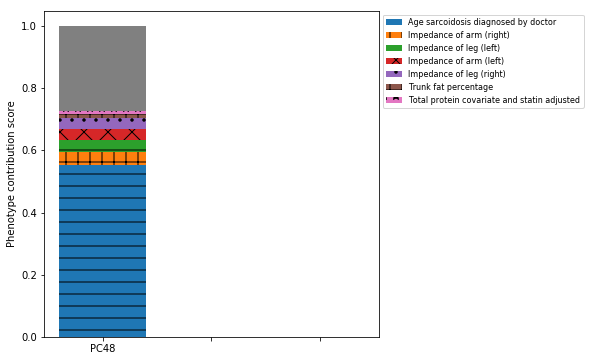

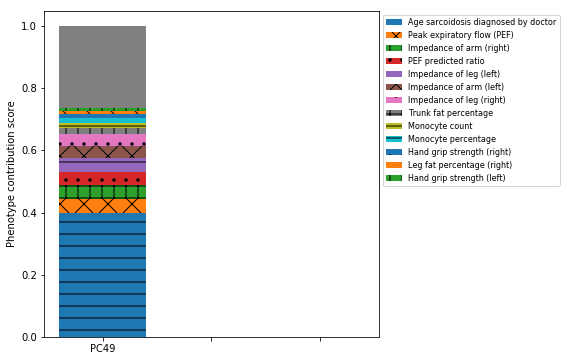

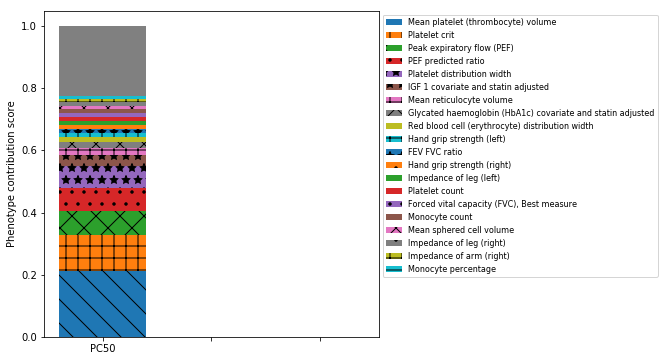

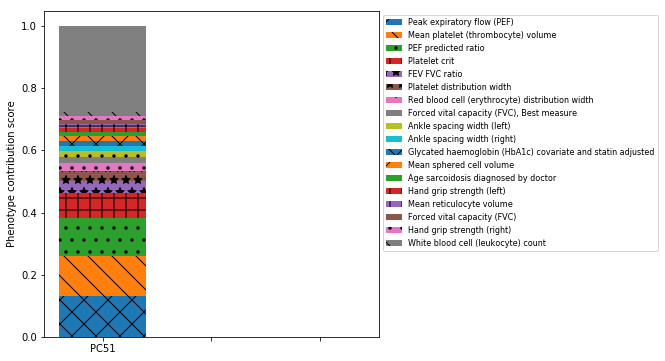

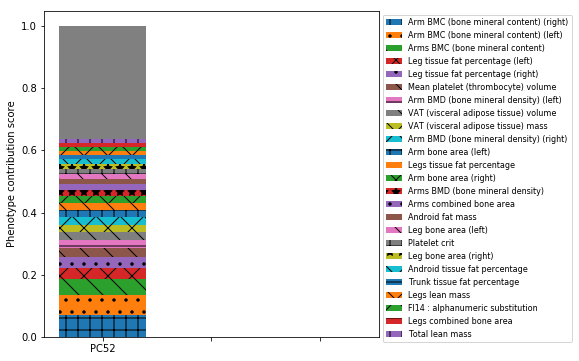

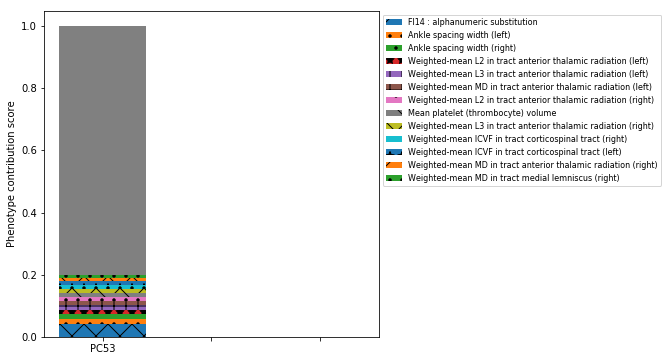

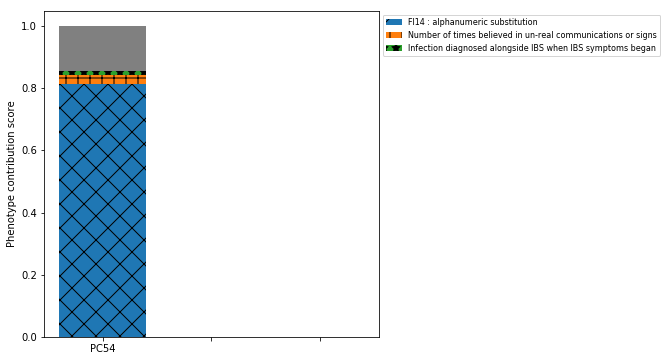

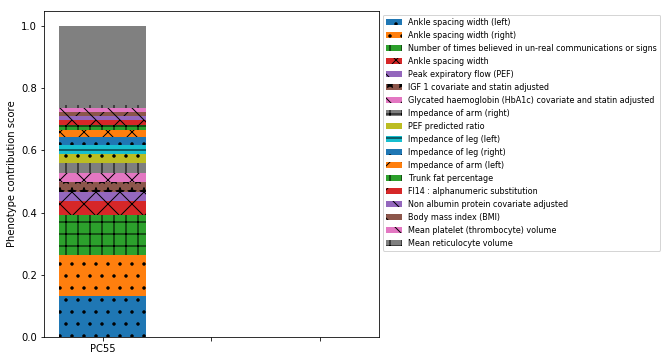

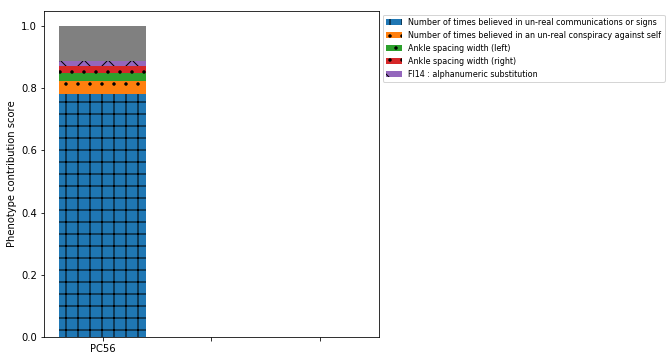

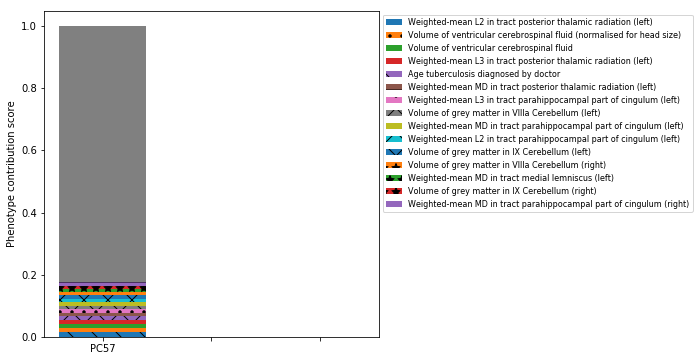

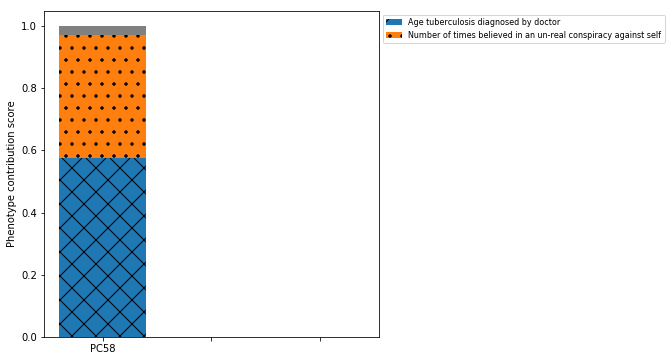

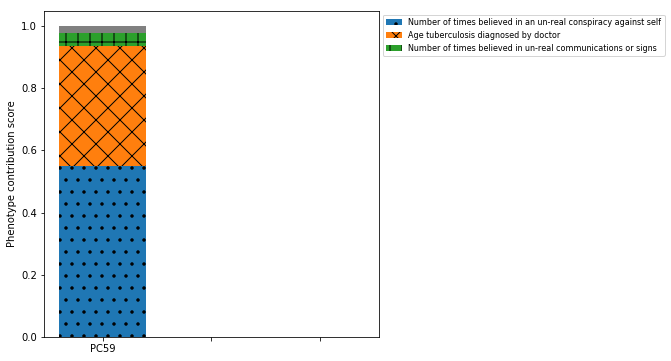

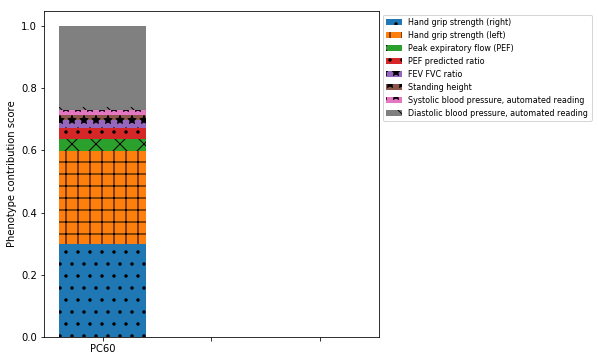

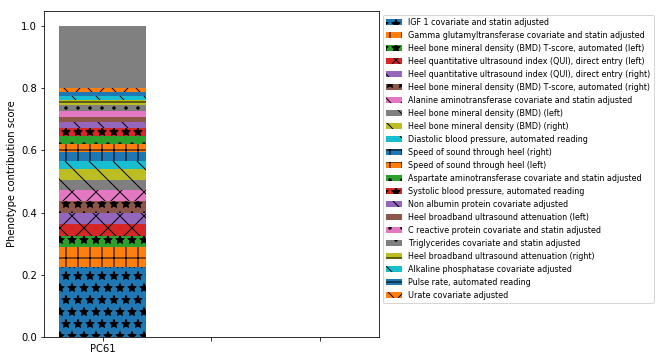

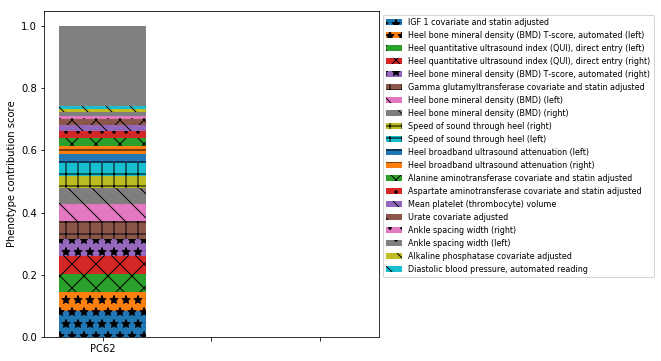

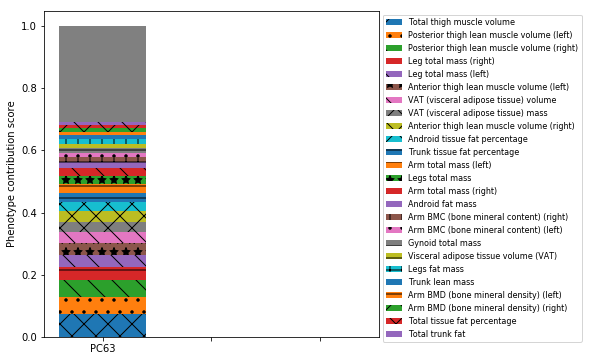

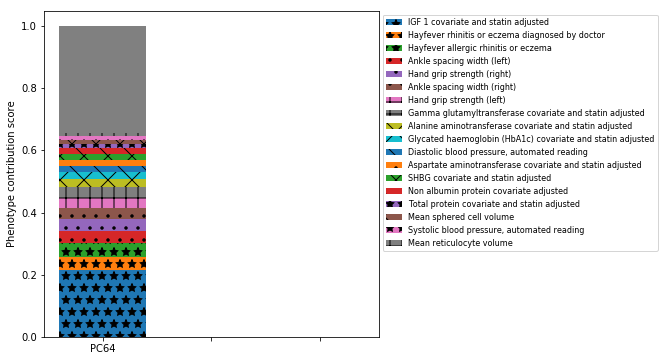

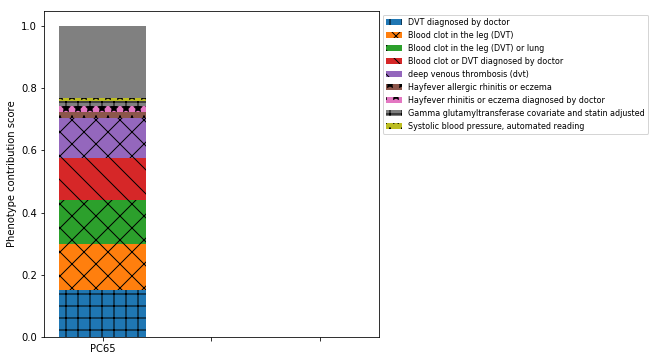

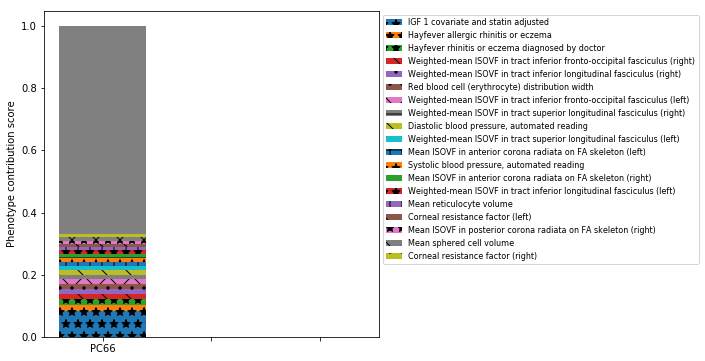

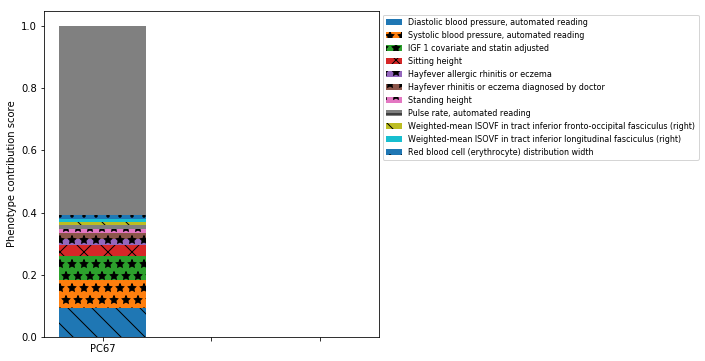

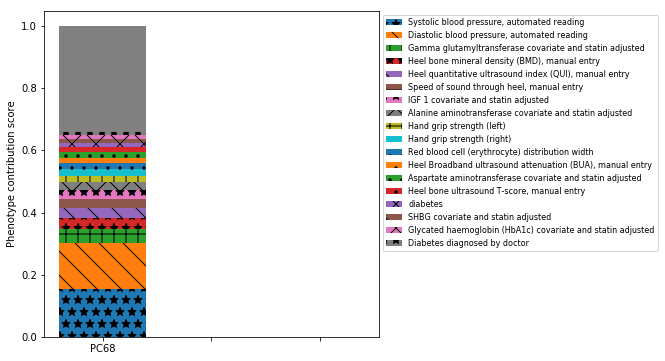

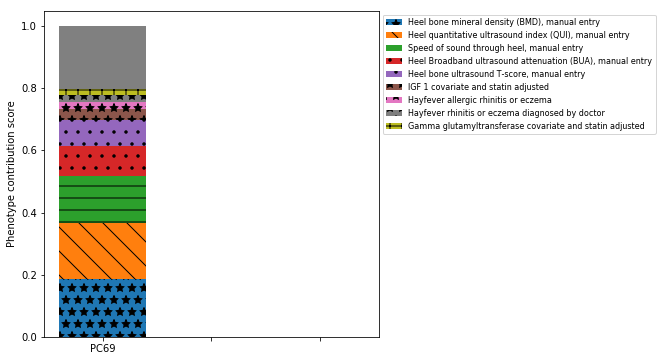

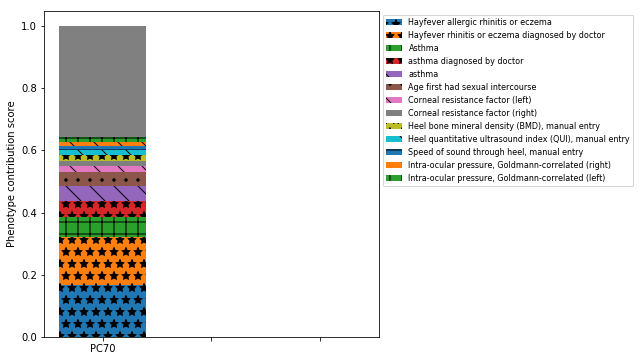

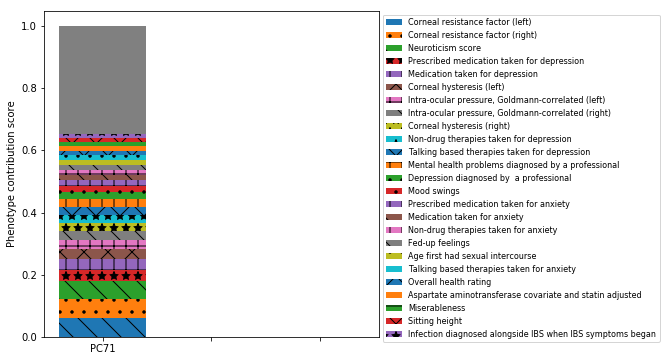

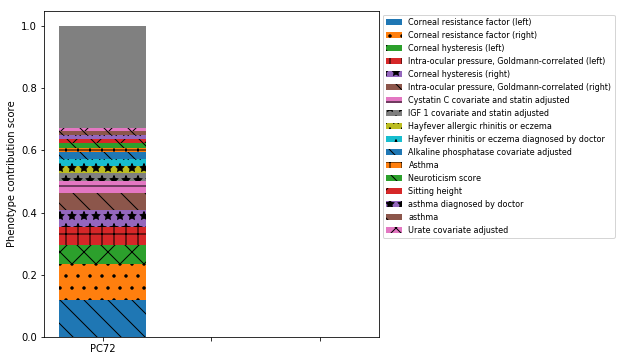

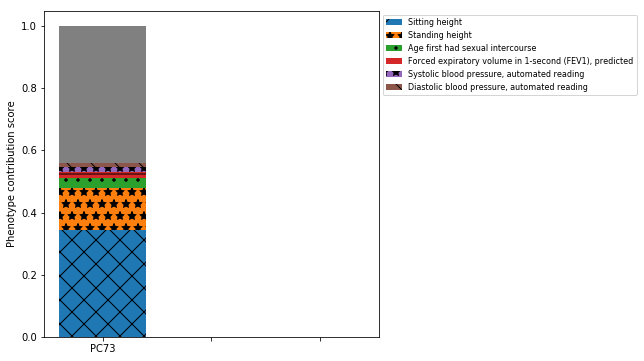

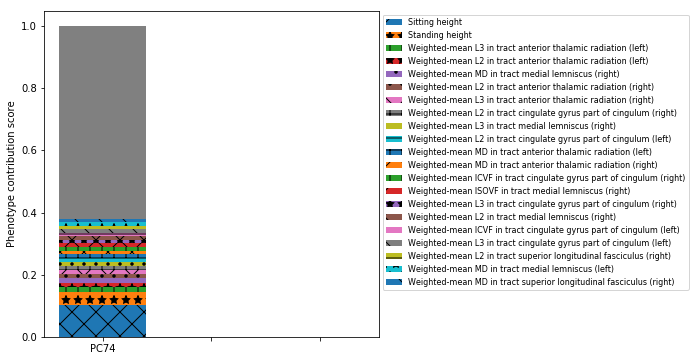

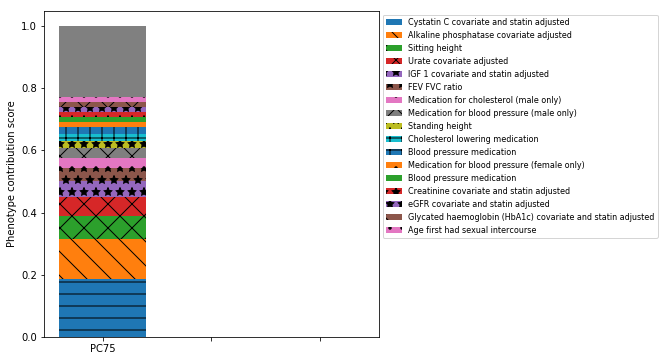

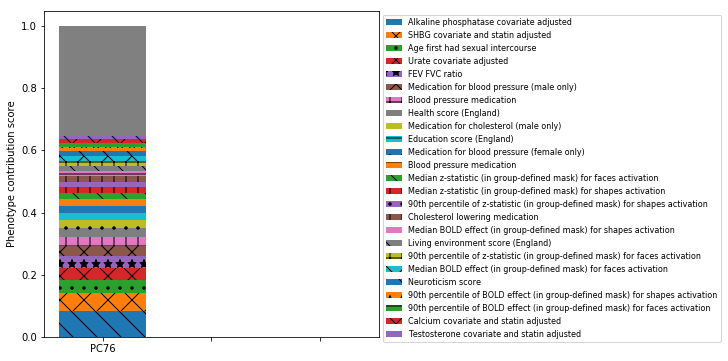

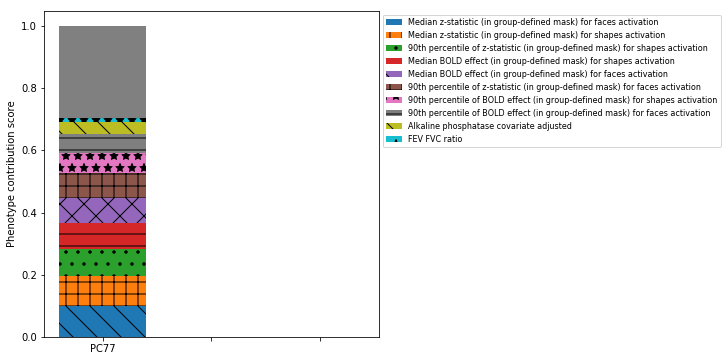

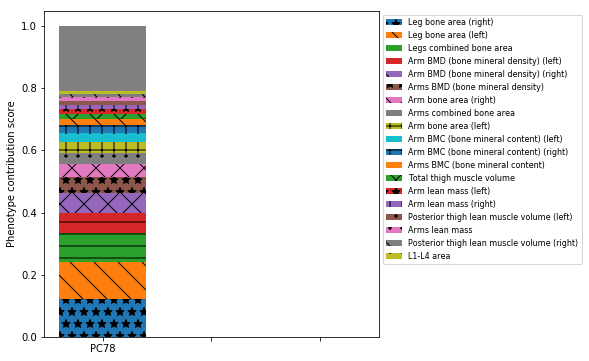

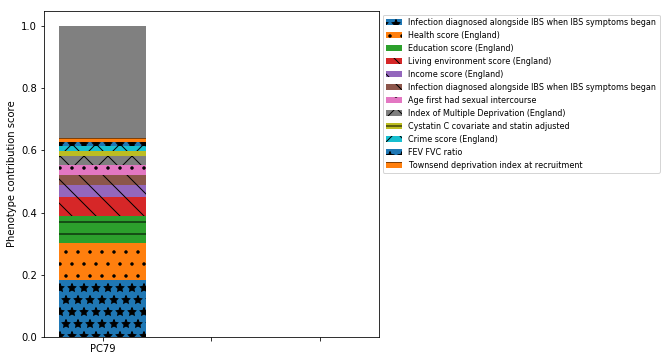

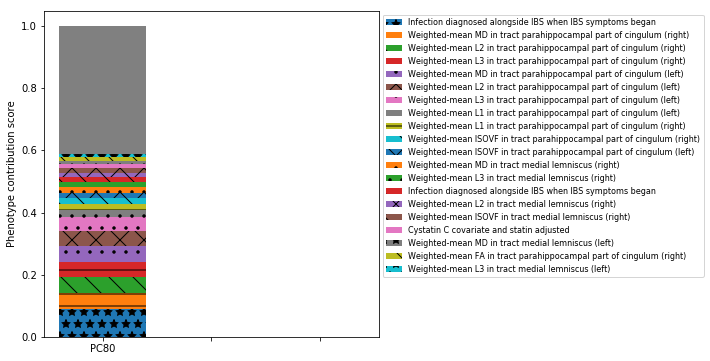

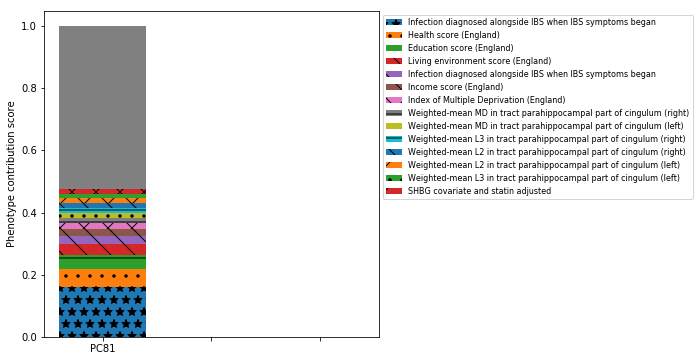

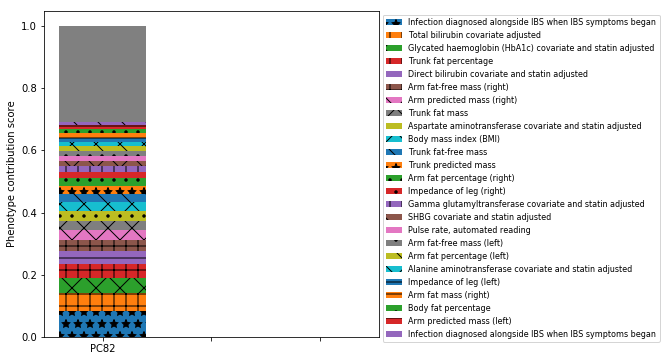

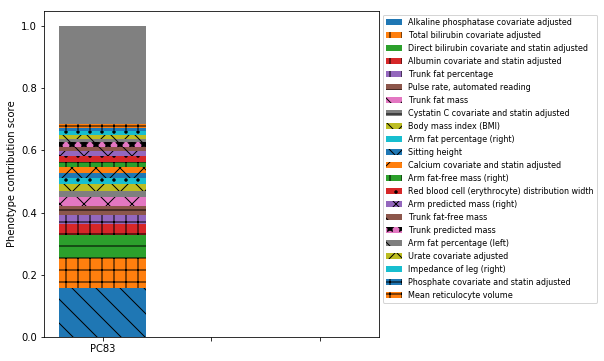

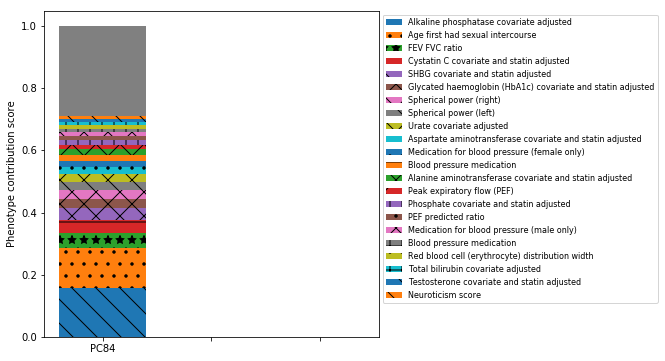

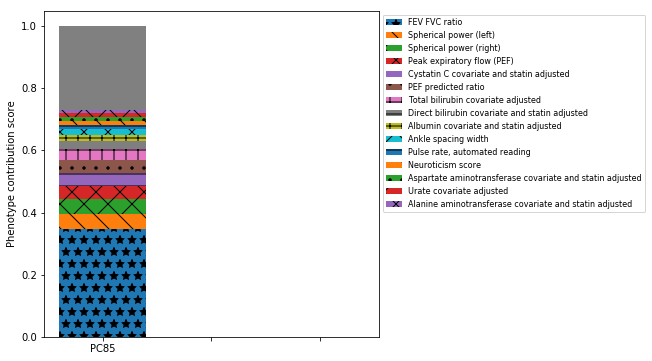

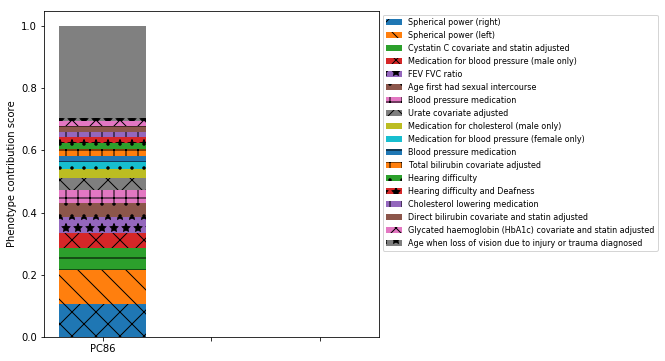

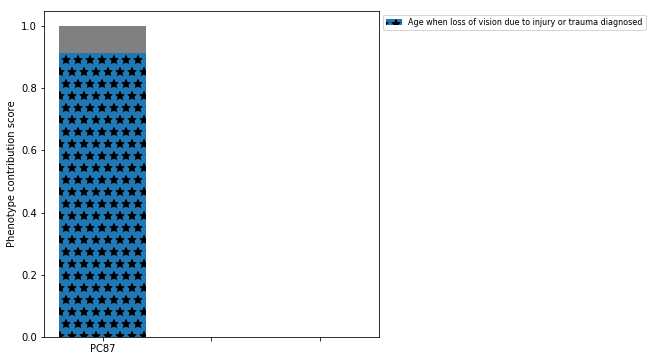

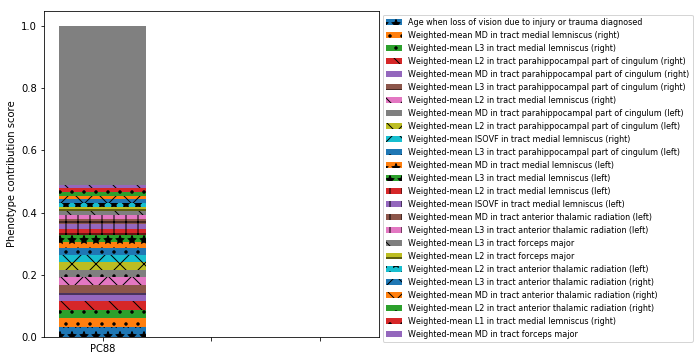

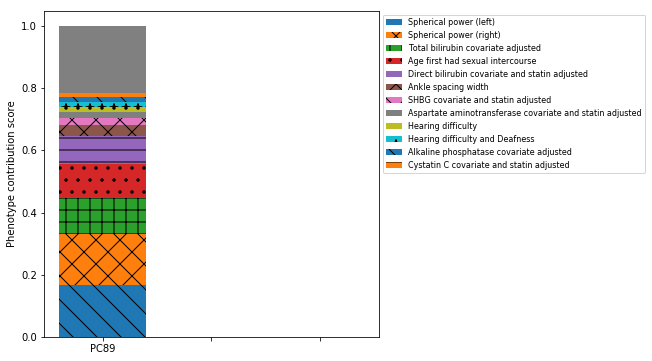

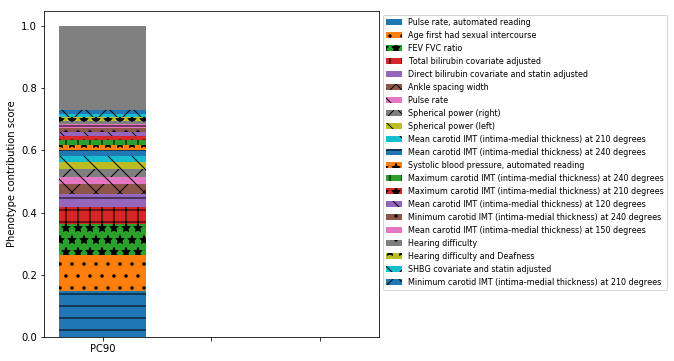

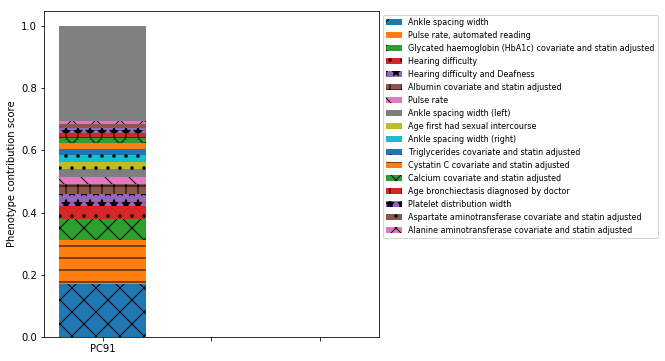

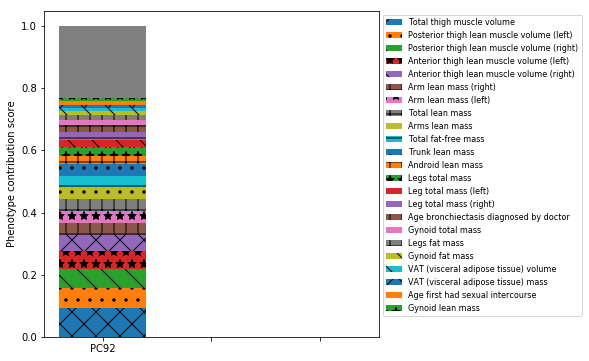

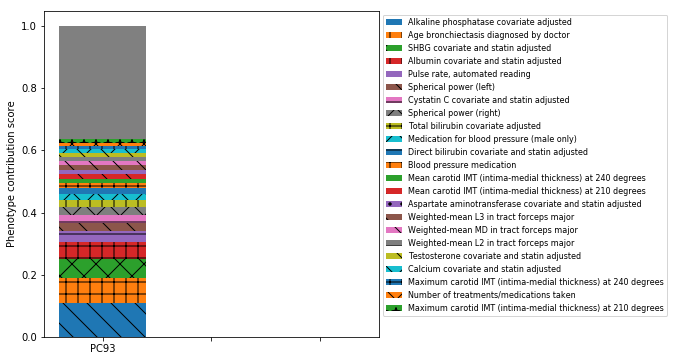

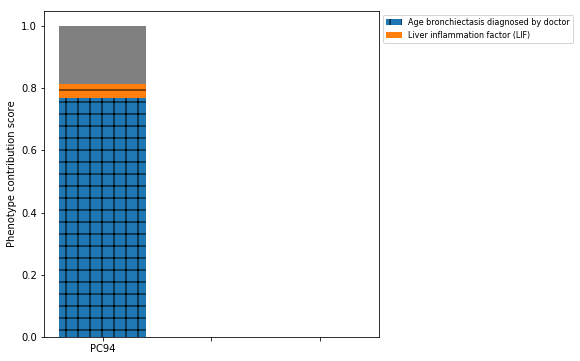

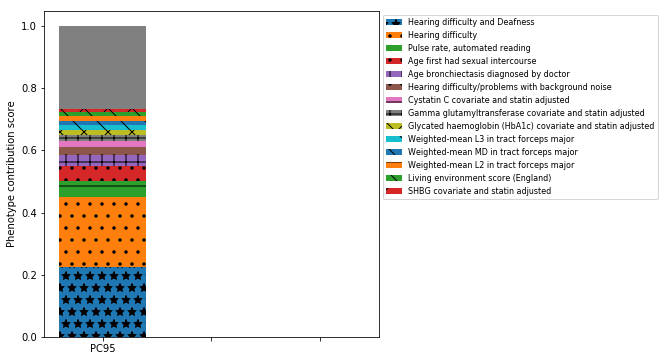

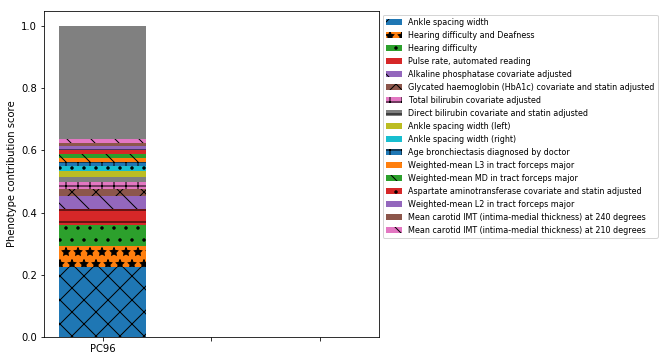

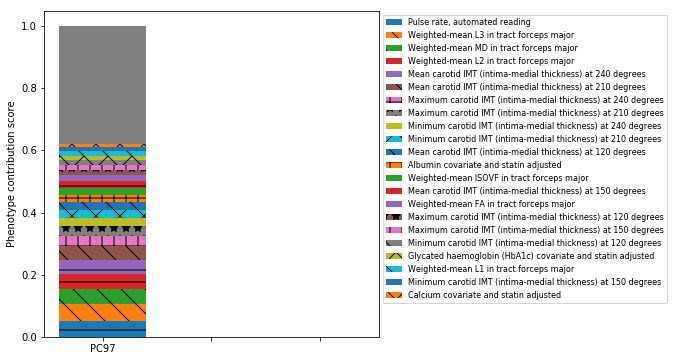

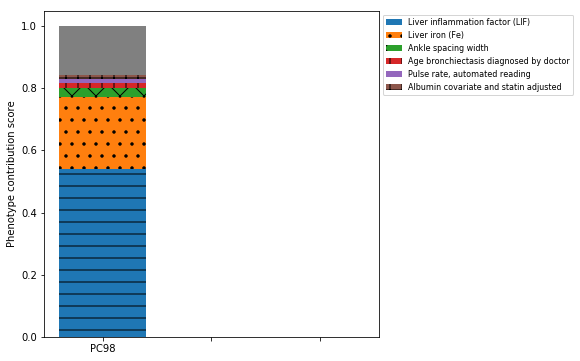

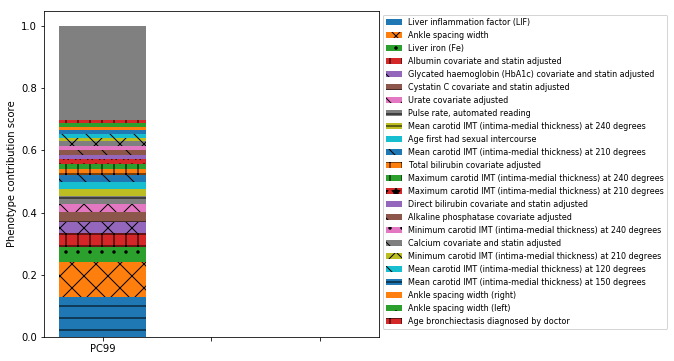

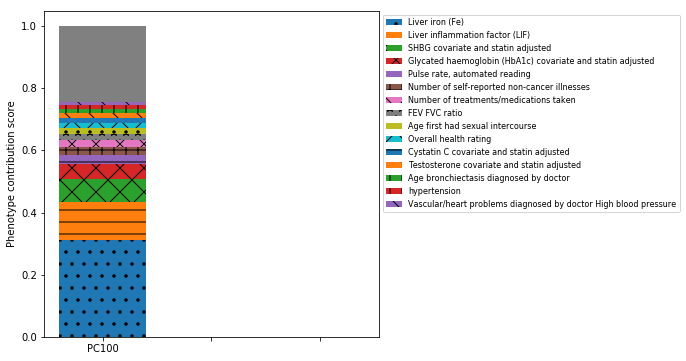

In [5]:
patterns = ('-', '+', 'x', '\\', '*', '.')
for pc in range(npc):
    plt.figure(figsize=(6,6))
    ranked_pcs=np.argsort(z['V'][:,pc]**2)[::-1]
    for ix,phe_ix in enumerate(ranked_pcs):
        if (z['V'][phe_ix,pc]**2)/np.sum(z['V'][:,pc]**2) > 0.01 and ix < 25:
            plt.bar(list(range(3)),
                    [(z['V'][phe_ix,pc]**2)/np.sum(z['V'][:,pc]**2),0,0], 
                    bottom=np.sum(z['V'][ranked_pcs[:ix],pc]**2),
                    label=code2phe[z['label_phe_code'][phe_ix]].replace('_',' '),
                    hatch=patterns[(phe_ix + 4) % len(patterns) ]
                   )
        else:
            plt.bar(list(range(3)),
                    [1-(np.sum(z['V'][ranked_pcs[:ix],pc]**2)/np.sum(z['V'][:,pc]**2)),0,0],
                    bottom=np.sum(z['V'][ranked_pcs[:ix],pc]**2)/np.sum(z['V'][:,pc]**2), 
                    color='grey')
            plt.xticks(list(range(3)), ['PC{}'.format(pc+1),'',''])
            plt.ylabel('Phenotype contribution score')
            plt.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
            break
    plt.show()